In [4]:
import warnings
warnings.simplefilter("ignore")
from nltk.corpus import stopwords

In [5]:
import sys
sys.path.append('.')
import utils



# Les instructions suivantes sont TRES utile pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Chargement des données

In [6]:
comments, notes = utils.load_data()

In [7]:
print(notes[0],comments[0])

8.0 et voila un triplette de bubblees rouges et pop je t inverse deux bubblees chez toi avec un noir biensur    pas assez tordu pour vous    alors que pensez vous des bubblees violets qui renvoient un des votres chez la planète adverse  ah ah   là je vous tiens  c est plus tactique qu il n y parait et bien retord   avec un peu de chance c est vrai  mais n est il pas encore plus agréable et jouissif de gagner même lorsque le sort s acharne contre vous  je n ai pas encore l extension mais elle sera bientôt mienne 


In [8]:
cls = utils.binarisation(notes)

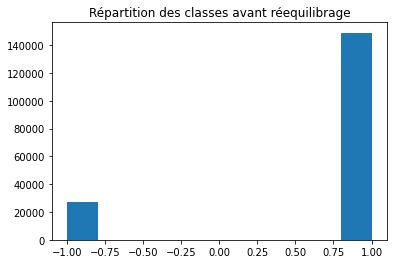

In [9]:
import matplotlib.pyplot as plt
plt.hist(cls)
plt.title('Répartition des classes avant réequilibrage')
plt.show()

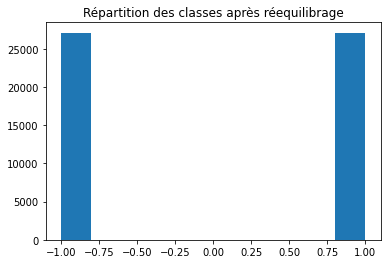

In [10]:
### Juste pour la visualisation à ne pas utiliser dans la suite 

from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
com = count_vect.fit_transform(comments)
rus = RandomUnderSampler(random_state=42)
comments_resample, cls_resample = rus.fit_resample(com, cls)

plt.hist(cls_resample)
plt.title('Répartition des classes après réequilibrage')
plt.show()

### Les mots les plus fréquenrs

In [11]:
# tri les mots par ordre décroissant de leurs fréquences, à lancer une seule fois c'est bon
mots_freq = utils.words_frequencies(comments)

In [12]:
k = 50
mots_k =[m for m,f in mots_freq[:k]]
print(f'Les {k} mots les plus fréquents: {mots_k}')

Les 50 mots les plus fréquents: ['de', 'et', 'le', 'est', 'un', 'les', 'jeu', 'la', 'des', 'en', 'pas', 'pour', 'on', 'que', 'une', 'qui', 'il', 'mais', 'ce', 'du', 'plus', 'je', 'dans', 'ne', 'avec', 'très', 'bien', 'au', 'qu', 'tout', 'se', 'sur', 'sont', 'ou', 'vous', 'cartes', 'peu', 'par', 'même', 'si', 'joueurs', 'bon', 'partie', 'fait', 'peut', 'ai', 'faire', 'jouer', 'parties', 'ça']


## Variantes et évaluations

In [13]:
model, vectorizer = utils.count_vectorizer(comments, notes)
utils.top_words(model, vectorizer) 

Best model: Logistic Regression
Logistic regression accuracy: 0.8091722277438591  f1-score: 0.8251763313043985
Top 10 mots positifs:  ['excellent', 'bémol', 'roule', 'foncez', 'pépite', 'régal', 'volontiers', 'abuser', 'redoutable', 'mac']
Top 10 mots négatifs:  ['décevant', 'fade', 'ennuyeux', 'ennuyé', 'poussif', 'ennui', 'ascendant', 'revendu', 'interet', 'gâché']


In [14]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes)
utils.top_words(model, vectorizer) 

Best model: Logistic Regression
Logistic regression accuracy: 0.8240238534715321  f1-score: 0.8373630018941829
Top 10 mots positifs:  ['excellent', 'bon', 'bémol', 'bien', 'adore', 'agréable', 'parfait', 'efficace', 'attention', 'aussi']
Top 10 mots négatifs:  ['intérêt', 'déception', 'aucune', 'pas', 'ennui', 'ennuyeux', 'bof', 'rien', 'déçu', 'répétitif']


### Stopwords

In [15]:
model, vectorizer = utils.count_vectorizer(comments, notes, stop_words=stopwords.words('french'))
utils.top_words(model, vectorizer) 

Best model: SVM
Svm accuracy: 0.7779071418429646  f1-score: 0.7994110672230202
Top 10 mots positifs:  ['nijas', 'datait', 'mikerinos', 'garanties', 'remplacerais', 'octroie', 'fusent', 'malandrin', 'pépite', 'galactica']
Top 10 mots négatifs:  ['réfléchisseurs', 'marquante', 'ascendant', 'tiendrai', 'passionner', 'euphémisme', 'séduisants', 'transcendé', 'permettraient', 'alcoolisée']


In [16]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes, stop_words=stopwords.words('french'))
utils.top_words(model, vectorizer) 

Best model: Logistic Regression
Logistic regression accuracy: 0.8197359079937526  f1-score: 0.8337093718502294
Top 10 mots positifs:  ['excellent', 'bon', 'bémol', 'bien', 'agréable', 'adore', 'efficace', 'bonheur', 'parfait', 'réussite']
Top 10 mots négatifs:  ['déception', 'intérêt', 'déçu', 'ennuyeux', 'ennui', 'aucune', 'ennuie', 'bof', 'décevant', 'répétitif']


### Stopswords et les 200 termes les plus fréquents

In [17]:
k = 200
mots_k =[m for m,f in mots_freq[:k]]
stop_words = mots_k + stopwords.words('french')
model, vectorizer = utils.count_vectorizer(comments, notes, stop_words=stop_words)
utils.top_words(model, vectorizer) 

Best model: Logistic Regression
Logistic regression accuracy: 0.7889819679114014  f1-score: 0.8085742341093869
Top 10 mots positifs:  ['bémol', 'pépite', 'régal', 'priver', 'assurée', 'foncez', 'mac', 'redoutable', 'thématiquement', 'jouissif']
Top 10 mots négatifs:  ['décevant', 'ennuyé', 'ennuyeux', 'poussif', 'fade', 'ennui', 'déception', 'revendu', 'accroché', 'interet']


In [18]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes, stop_words=stop_words)
utils.top_words(model, vectorizer) 

Best model: Logistic Regression
Logistic regression accuracy: 0.8069572625301717  f1-score: 0.8228293706105443
Top 10 mots positifs:  ['bémol', 'efficace', 'fluide', 'adore', 'réussite', 'bonheur', 'bravo', 'attention', 'parfait', 'excellente']
Top 10 mots négatifs:  ['déception', 'intérêt', 'ennuyeux', 'ennui', 'aucune', 'déçu', 'bof', 'ennuie', 'décevant', 'accroché']


### Stopswords et les 2 000 termes les plus fréquents

In [19]:
k = 2_000
mots_k =[m for m,f in mots_freq[:k]]
stop_words = mots_k + stopwords.words('french')
model, vectorizer = utils.count_vectorizer(comments, notes, stop_words=stop_words)
utils.top_words(model, vectorizer) 

Best model: Random Forest
Random forest accuracy: 0.8233423257134743  f1-score: 0.7972948891404649
Poids des mots positifs et négatifs non connus, entre guillemets !


In [20]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes, stop_words=stop_words, preprocessor=utils.stem)
utils.top_words(model, vectorizer) 

Best model: Logistic Regression
Logistic regression accuracy: 0.7831889819679114  f1-score: 0.8034957584216009
Top 10 mots positifs:  ['agréabl', 'efficac', 'fluid', 'reproch', 'parf', 'ador', 'auss', 'fonc', 'vindjeu', 'hésit']
Top 10 mots négatifs:  ['décept', 'décev', 'répétit', 'pir', 'désol', 'accroch', 'fad', 'mauv', 'dommag', 'malheur']


### Stopswords et les 20 000 termes les plus fréquents

In [21]:
k = 20_000
mots_k =[m for m,f in mots_freq[:k]]
stop_words = mots_k + stopwords.words('french')
model, vectorizer = utils.count_vectorizer(comments, notes, stop_words=stop_words)
utils.top_words(model, vectorizer) 

Best model: Random Forest
Random forest accuracy: 0.8434189975862558  f1-score: 0.7761782269085544
Poids des mots positifs et négatifs non connus, entre guillemets !


In [22]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes, stop_words=stop_words)
utils.top_words(model, vectorizer) 

Best model: Random Forest
Random forest accuracy: 0.84390174641488  f1-score: 0.7764252283291145
Poids des mots positifs et négatifs non connus, entre guillemets !


In [23]:
model, vectorizer = utils.count_vectorizer(comments, notes, stop_words=stop_words,preprocessor=utils.stem)
utils.top_words(model, vectorizer) 

Best model: Logistic Regression
Logistic regression accuracy: 0.6140281130200199  f1-score: 0.6674449468019736
Top 10 mots positifs:  ['revivr', 'hav', 'réactualis', 'prestat', 'rid', 'robb', 'jouiss', 'fonc', 'proxim', 'espagn']
Top 10 mots négatifs:  ['atz', 'décept', 'cred', 'fad', 'décev', 'obsolet', 'fatid', 'désol', 'farfadet', 'afflig']


### Bigrammes

In [24]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes,  ngram_range=(1, 2))
utils.top_words(model, vectorizer) 

Best model: SVM
Svm accuracy: 0.842652278858441  f1-score: 0.8529017047719054
Top 10 mots positifs:  ['excellent', 'bon jeu', 'très bon', 'pas trop', 'pas mal', 'un peu', 'adore', 'bémol', 'bien', 'bon petit']
Top 10 mots négatifs:  ['déception', 'intérêt', 'pas', 'trop', 'ennuyeux', 'ennui', 'aucune', 'déçu', 'bof', 'décevant']


In [25]:
model, vectorizer = utils.count_vectorizer(comments, notes, ngram_range=(1, 2), max_df=0.5, stop_words=stopwords.words('french'))
utils.top_words(model, vectorizer)

Best model: Logistic Regression
Logistic regression accuracy: 0.8252449240380519  f1-score: 0.8387773692039843
Top 10 mots positifs:  ['excellent', 'bon petit', 'bémol', 'must', 'bravo', 'très bon', 'bonheur', 'bonne extension', 'peu long', 'excellente']
Top 10 mots négatifs:  ['ennuyeux', 'ennui', 'décevant', 'bof', 'déception', 'accroché', 'ennuie', 'ennuyé', 'nul', 'fade']


In [26]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes, ngram_range=(1, 2), max_df=0.5, stop_words=stopwords.words('french'))
utils.top_words(model, vectorizer)

Best model: SVM
Svm accuracy: 0.833962799943206  f1-score: 0.8456417971666085
Top 10 mots positifs:  ['excellent', 'bon jeu', 'très bon', 'bémol', 'bon petit', 'adore', 'bonheur', 'agréable', 'parfait', 'réussite']
Top 10 mots négatifs:  ['déception', 'intérêt', 'ennui', 'ennuie', 'déçu', 'ennuyeux', 'répétitif', 'aucune', 'décevant', 'bof']


In [27]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes, stop_words=stop_words)
utils.top_words(model, vectorizer) 

Best model: Random Forest
Random forest accuracy: 0.84390174641488  f1-score: 0.7764252283291145
Poids des mots positifs et négatifs non connus, entre guillemets !


### Trigrammes

In [28]:
model, vectorizer = utils.count_vectorizer(comments, notes, ngram_range=(1, 3))
utils.top_words(model, vectorizer) 

Best model: Logistic Regression
Logistic regression accuracy: 0.8352406644895641  f1-score: 0.846961122751799
Top 10 mots positifs:  ['excellent', 'pas mal', 'adore', 'pas trop', 'excellente', 'indispensable', 'parfait', 'très bon', 'bémol', 'génial']
Top 10 mots négatifs:  ['bof', 'ennuyeux', 'ennui', 'déception', 'intérêt', 'nul', 'décevant', 'déçu', 'aucune', 'pff']


In [29]:
model, vectorizer = utils.count_vectorizer(comments, notes, ngram_range=(1, 3))
utils.top_words(model, vectorizer) 

Best model: Logistic Regression
Logistic regression accuracy: 0.8352406644895641  f1-score: 0.846961122751799
Top 10 mots positifs:  ['excellent', 'pas mal', 'adore', 'pas trop', 'excellente', 'indispensable', 'parfait', 'très bon', 'bémol', 'génial']
Top 10 mots négatifs:  ['bof', 'ennuyeux', 'ennui', 'déception', 'intérêt', 'nul', 'décevant', 'déçu', 'aucune', 'pff']


In [30]:
model, vectorizer = utils.count_vectorizer(comments, notes, ngram_range=(1, 3), max_df=0.5, stop_words=stopwords.words('french'))
utils.top_words(model, vectorizer)

Best model: Logistic Regression
Logistic regression accuracy: 0.8251313360783757  f1-score: 0.8386725771137692
Top 10 mots positifs:  ['excellent', 'bémol', 'must', 'adore', 'bonheur', 'très bon', 'bravo', 'excellente', 'parfait', 'peu long']
Top 10 mots négatifs:  ['ennuyeux', 'bof', 'ennui', 'déception', 'accroché', 'décevant', 'ennuie', 'intérêt', 'nul', 'convaincu']


In [31]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes, ngram_range=(1, 2), max_df=0.5, stop_words=stopwords.words('french'))
utils.top_words(model, vectorizer)

Best model: SVM
Svm accuracy: 0.833962799943206  f1-score: 0.8456417971666085
Top 10 mots positifs:  ['excellent', 'bon jeu', 'très bon', 'bémol', 'bon petit', 'adore', 'bonheur', 'agréable', 'parfait', 'réussite']
Top 10 mots négatifs:  ['déception', 'intérêt', 'ennui', 'ennuie', 'déçu', 'ennuyeux', 'répétitif', 'aucune', 'décevant', 'bof']


### Stem

In [32]:
stop_words = stopwords.words('french')
model, vectorizer = utils.count_vectorizer(comments, notes, stop_words=stop_words,preprocessor=utils.stem)
utils.top_words(model, vectorizer) 

Best model: SVM
Svm accuracy: 0.775976146528468  f1-score: 0.7976601213545522
Top 10 mots positifs:  ['nij', 'azul', 'keyring', 'tempil', 'ela', 'joyeu', 'déchet', 'temprois', 'bong', 'carbon']
Top 10 mots négatifs:  ['rendon', 'ascend', 'fluiditel', 'réfléchisseur', 'atz', 'galvaud', 'boitesvoil', 'descel', 'récif', 'navr']


In [33]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes, stop_words=stop_words,preprocessor=utils.stem)
utils.top_words(model, vectorizer) 

Best model: Logistic Regression
Logistic regression accuracy: 0.8133465852619622  f1-score: 0.8284838145108614
Top 10 mots positifs:  ['excellent', 'bémol', 'bon', 'agréabl', 'efficac', 'bien', 'parf', 'reproch', 'must', 'ador']
Top 10 mots négatifs:  ['ennui', 'décept', 'intérêt', 'aucun', 'déçu', 'bof', 'décev', 'répétit', 'accroch', 'dommag']


### Lemmatize

In [35]:
stop_words = stopwords.words('french')
model, vectorizer = utils.count_vectorizer(comments, notes, stop_words=stop_words,preprocessor=utils.lemmatize)
utils.top_words(model, vectorizer) 

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/Users/souleymbaye/nltk_data'
    - '/usr/local/opt/python@3.9/Frameworks/Python.framework/Versions/3.9/nltk_data'
    - '/usr/local/opt/python@3.9/Frameworks/Python.framework/Versions/3.9/share/nltk_data'
    - '/usr/local/opt/python@3.9/Frameworks/Python.framework/Versions/3.9/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes, stop_words=stop_words,preprocessor=utils.lemmatize)
utils.top_words(model, vectorizer) 